In [1]:
import sys
import os
os.chdir(r'..')

import numpy as np
from numpy.linalg import eigvals
import pandas as pd
import geopandas as gpd
import scipy.stats as st
import networkx as nx
import scipy as sp 
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import hickle

sys.path.append(os.getcwd() + '/outputs')
sys.path.append(os.getcwd() + '/functions')
sys.path.append(os.getcwd() + '/data')


import vaccination as vacc
import vaccination as iv
import models
import transnet
import data_loader as dl
import plotting as pl

import warnings

warnings.simplefilter(action='ignore')


%matplotlib inline

/Users/jmunday/Documents/InterepidemicPeriods


In [2]:
schools_data = dl.load_schools_data()
pri_BRIN = schools_data.query('kind=="pri"').BRIN
sec_BRIN = schools_data.query('kind=="sec"').BRIN
Reformed_BRIN = schools_data.query('Denomination == "Reformatorisch"').BRIN

In [3]:
vacc_samps_all = pd.DataFrame()
for i in range(1000): 
    vacc_frame_samp = pd.DataFrame.from_dict(transnet.vacc_dict_samples['sample ' +  str(i)], orient='index').reset_index()
    vacc_samps_all = pd.concat([vacc_samps_all, vacc_frame_samp])
    

In [4]:
vacc_samps_all.columns = ['BRIN', 'vacc']

In [5]:
mean_vacc_dict = vacc_samps_all.groupby('BRIN').median().to_dict()['vacc']

In [6]:
vacc_dict_yso = [transnet.create_yso_dict(y, mean_vacc_dict, 
                                         transnet.school_data, years_in_pri=8., 
                                         years_in_sec=5., post_outbreak=0.98) for y in range(1, 14, 1)]

In [7]:
vacc_dict_yso_dict = dict(np.transpose([['sample ' + str(y) for y in range(13)] , vacc_dict_yso]))

In [8]:
vacc_list = [pd.DataFrame.from_dict(vacc_dict_yso[y], orient='index').reset_index() for y in range(0,12)]

In [21]:
for i, y in enumerate(range(0,len(vacc_list))): 
    vacc_list[i]['year'] = y

In [43]:
vacc_list_all = pd.concat(vacc_list)
vacc_list_all.columns = ['BRIN', 'Immune', 'Year']
vacc_list_all['Susceptible'] = 1 - vacc_list_all.Immune



In [123]:
largest_comp = np.asarray(loaded_cons_yso, dtype=object)[np.asarray(loaded_vacc_yso, dtype=object) == str(6)][2726]

In [322]:
pc4_shapes = gpd.read_file(os.getcwd() + r'/data/Location data/openpc4nl2015landonly/PC4_Nederland_2015.shp') 

<module 'transnet' from '/Users/jmunday/Documents/InterepidemicPeriods/functions/transnet.py'>

In [616]:
importlib.reload(transnet)

<module 'transnet' from '/Users/jmunday/Documents/InterepidemicPeriods/functions/transnet.py'>

In [617]:
#figure = plt.figure(figsize=[10,6])
fig_pos = [3,4,7,8]
for i, year in enumerate([5,7,8,10]):
    print(i)
    ax = figure.add_subplot(2, 4,fig_pos[i])
    tm = hickle.load('outputs/netresyso/outbreaks/outbreak_' + str(year) + '_' + str(10) +'.hkl').todense()*1.0
    obnet = transnet.create_network_from_transmat(tm,nodelist=list(obnet.nodes))
    outdeg = obnet.out_degree()
    indeg = obnet.in_degree()
    all_outcond = [n for n in obnet.nodes() if outdeg[n] > 0]
    all_incond = [n for n in obnet.nodes() if indeg[n] > 0]
    to_keep = list(set(all_outcond + all_incond))
    largest_con = []
    for k in to_keep: 
        #print(k) 
        con_list = []
        edge_list = []
        nod_list = [k]
        while len(nod_list) > 0:
            con_list.extend(nod_list) 
            nod_list_new = []
            for n in nod_list: 
                new_off = list(obnet.successors(n))
                new_off = list(np.setdiff1d(new_off, con_list))
                if len(new_off) == 1: 
                    edge_list.extend([[n, new_off[0]]])
                else: 
                    edge_list.extend(np.column_stack((list(np.repeat(n, len(new_off))), new_off)).tolist())
                nod_list_new.extend(new_off)
                con_list.extend(nod_list_new)
            nod_list = np.copy(nod_list_new)
        if len(con_list) > len(largest_con):
            largest_con = con_list
    
    pc4_shapes.plot(facecolor="gray", 
                    edgecolor='white', 
                    lw=0.5, 
                    alpha=0.2, 
                    ax=ax)
    net_to_plot = obnet.subgraph(largest_con).to_undirected()
    transnet.plot_transnet_curved(net_to_plot, 
                                  sizes = np.ones_like(net_to_plot.nodes(), dtype=float),
                                  pos = transnet.pos_geo, 
                                  highlight = sec_BRIN, 
                                  scale = 2., 
                                  ax = ax, 
                                  title = str(2014 + year + 4))
    transnet.pos_geo


0
1
2
3


<Figure size 1920x1440 with 0 Axes>

In [56]:
i = 0
loaded_cons_yso = []
loaded_seeds_yso = []
loaded_vacc_yso = []
dirlist = os.listdir('outputs/netresyso/succ')
for f in dirlist:
    if 'DS_Store' not in f:
        loaded_cons_yso.append(list(np.load('outputs/netresyso/succ/' + f)))
        loaded_seeds_yso.append(f[:6])
        loaded_vacc_yso.append(f[11:13].replace('_',''))

In [122]:
component_sizes = np.array([len(n) for n in np.asarray(loaded_cons_yso, dtype=object)[np.asarray(loaded_vacc_yso, dtype=object) == str(6)]])

In [101]:
np.where(component_sizes == max(component_sizes))

(array([  684,   704,  1085,  3678,  4682,  5796,  6168,  7031,  7114,
         7522,  9587,  9848, 13969, 14274, 14783, 15912, 16380, 19762,
        19798, 20453]),)

In [494]:
lambdas = []
for n in range(0,13): 
    tm = hickle.load('outputs/netresyso/transmats/transmat_' + str(n) +'.hkl').todense()*1.0
    obnet = transnet.create_network_from_transmat(tm,nodelist=transnet.nodes)
    lambdas.append(max(eigvals(tm).real))

In [619]:
ax = figure.add_subplot(3, 2, 1)
ax.plot(2014 + np.arange(4,17),lambdas, linewidth=0.3, marker='o', c='k')
ax.set_ylabel(r'Spectoral radius ($\rho$)')
ax.set_xlabel('')
ax.vlines(2014 + 12 - 0.5, 0, 10, color='r', linestyle='--')
ax.set_xticks([])
ax.set_title('A', loc='left')


Text(0.0, 1.0, 'A')

In [413]:
def make_FS_df(cons, seeds, vaccs, vacc_dict):
    FS_new = []
    for i, con in enumerate(cons):
        #print seed 
        seed = seeds[i]
        vacc_no = vaccs[i]
        vacc = vacc_dict['sample ' + str(int(vacc_no.replace('_','')))]
        cs = np.intersect1d(con, transnet.nodes)
        #print 'calc 1'
        FSs = np.array([FSList[int((1. - vacc[sch])*1000)] for sch in cs])
        #print 'calc 2'
        kidnos = np.array(num_frame.loc[cs].fillna(0).leerlingen)

        #print 'calc 3'
        no_inf = FSs*kidnos

        #print 'calc 4'
        tot_no_inf = no_inf.sum()
        
        pri_schools = np.intersect1d(cs , pri_BRIN)
        sec_schools = np.intersect1d(cs , sec_BRIN)
        
        

        FS_new.append([seed, vaccs[i], 1.*len(cs), 1.*len(pri_schools), 1.*len(sec_schools), tot_no_inf])
    FS_df = pd.DataFrame(FS_new, columns=['Seed', 'vacc', 'primary', 'secondar', 'schools', 'children'])
        
    return FS_df

In [414]:
FSList = [models.op_fs(p, 15.) for p in np.arange(0, 1., 0.001)]
num_frame = transnet.school_data[['BRIN', 'leerlingen']].set_index('BRIN')
FS_df_yso_ps = make_FS_df(loaded_cons_yso, loaded_seeds_yso, loaded_vacc_yso, vacc_dict_yso_dict )

In [620]:
mfs = []
for y in range(13):
    ys = str(y)
    sizelist = list(FS_df_yso_ps.query('vacc == @ys').children)
    sizelist_tot = sizelist
    mfs.append(sizelist_tot)

#fig = plt.figure(figsize = [7,2.5], dpi=300)
#boxprops = dict(linewidth=1, color='k')
#whiskerprops = dict(linewidth=1, color='k')
#medianprops = dict(linewidth=1, color='k')
#capprops = dict(linewidth=1, color='k')
ax = figure.add_subplot(3,2,5)    

for i, mf in enumerate(mfs):
    ax.plot(i + 0.75 + 0.5*np.random.random(len(mf)), mf, 'o', mec='gray', mew=0.2, mfc='none', ms=2, alpha=0.01)


#bp = ax.boxplot(mfs, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, capprops=capprops, 
                        #showfliers=False)
vp = ax.violinplot(mfs) 
                        #showfliers=False)
for pc in vp['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('white')
    pc.set_alpha(1)


for partname in ('cbars','cmins','cmaxes'):
    vpart = vp[partname]
    vpart.set_edgecolor('red')
    vpart.set_linewidth(1)
    
ax.set_xticks(1 + np.arange(13))
l = ax.set_xticklabels(4 + np.arange(13))

ax.set_xlabel('')
ax.set_ylabel('Children infected')

ax.set_xlabel('Year')
ax.set_title('C', loc='left')
ax.vlines(9 - 0.5, 0, 25000, color='r', linestyle='--')

ax.set_xticks(np.arange(1, 14, 2))
ax.set_xticklabels(2014 + 4 + np.arange(0, 13, 2))

[Text(1, 0, '2018'),
 Text(3, 0, '2020'),
 Text(5, 0, '2022'),
 Text(7, 0, '2024'),
 Text(9, 0, '2026'),
 Text(11, 0, '2028'),
 Text(13, 0, '2030')]

In [621]:
ax = figure.add_subplot(1,2,2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_title('D', loc='left')
ax.set_facecolor('none')


In [622]:
#fig = plt.figure(dpi=300, figsize=[7,3])
ax = figure.add_subplot(3,2,3)
cmap = cm.get_cmap('viridis_r')

for nsch in [1, 10, 20, 40, 80, 125]:
    ax.plot(2014 + 4 + np.arange(13), [1-sum(np.array(mfs_sc[y]) > nsch)/(1.*len(mfs_sc[12])) for y in range(13)], 's-', markersize=2, color = cmap((nsch - 3.)/97.),label='< ' + str(nsch) + ' Schools')
ax.set_ylabel('Proportion of outbreaks \n < n schools')

ax.legend()
ax.vlines(2014 + 12 - 0.5, 0, 1, color='r', linestyle='--')
ax.set_title('B', loc='left')
ax.set_xticks([])

[]

In [623]:
figure.tight_layout()

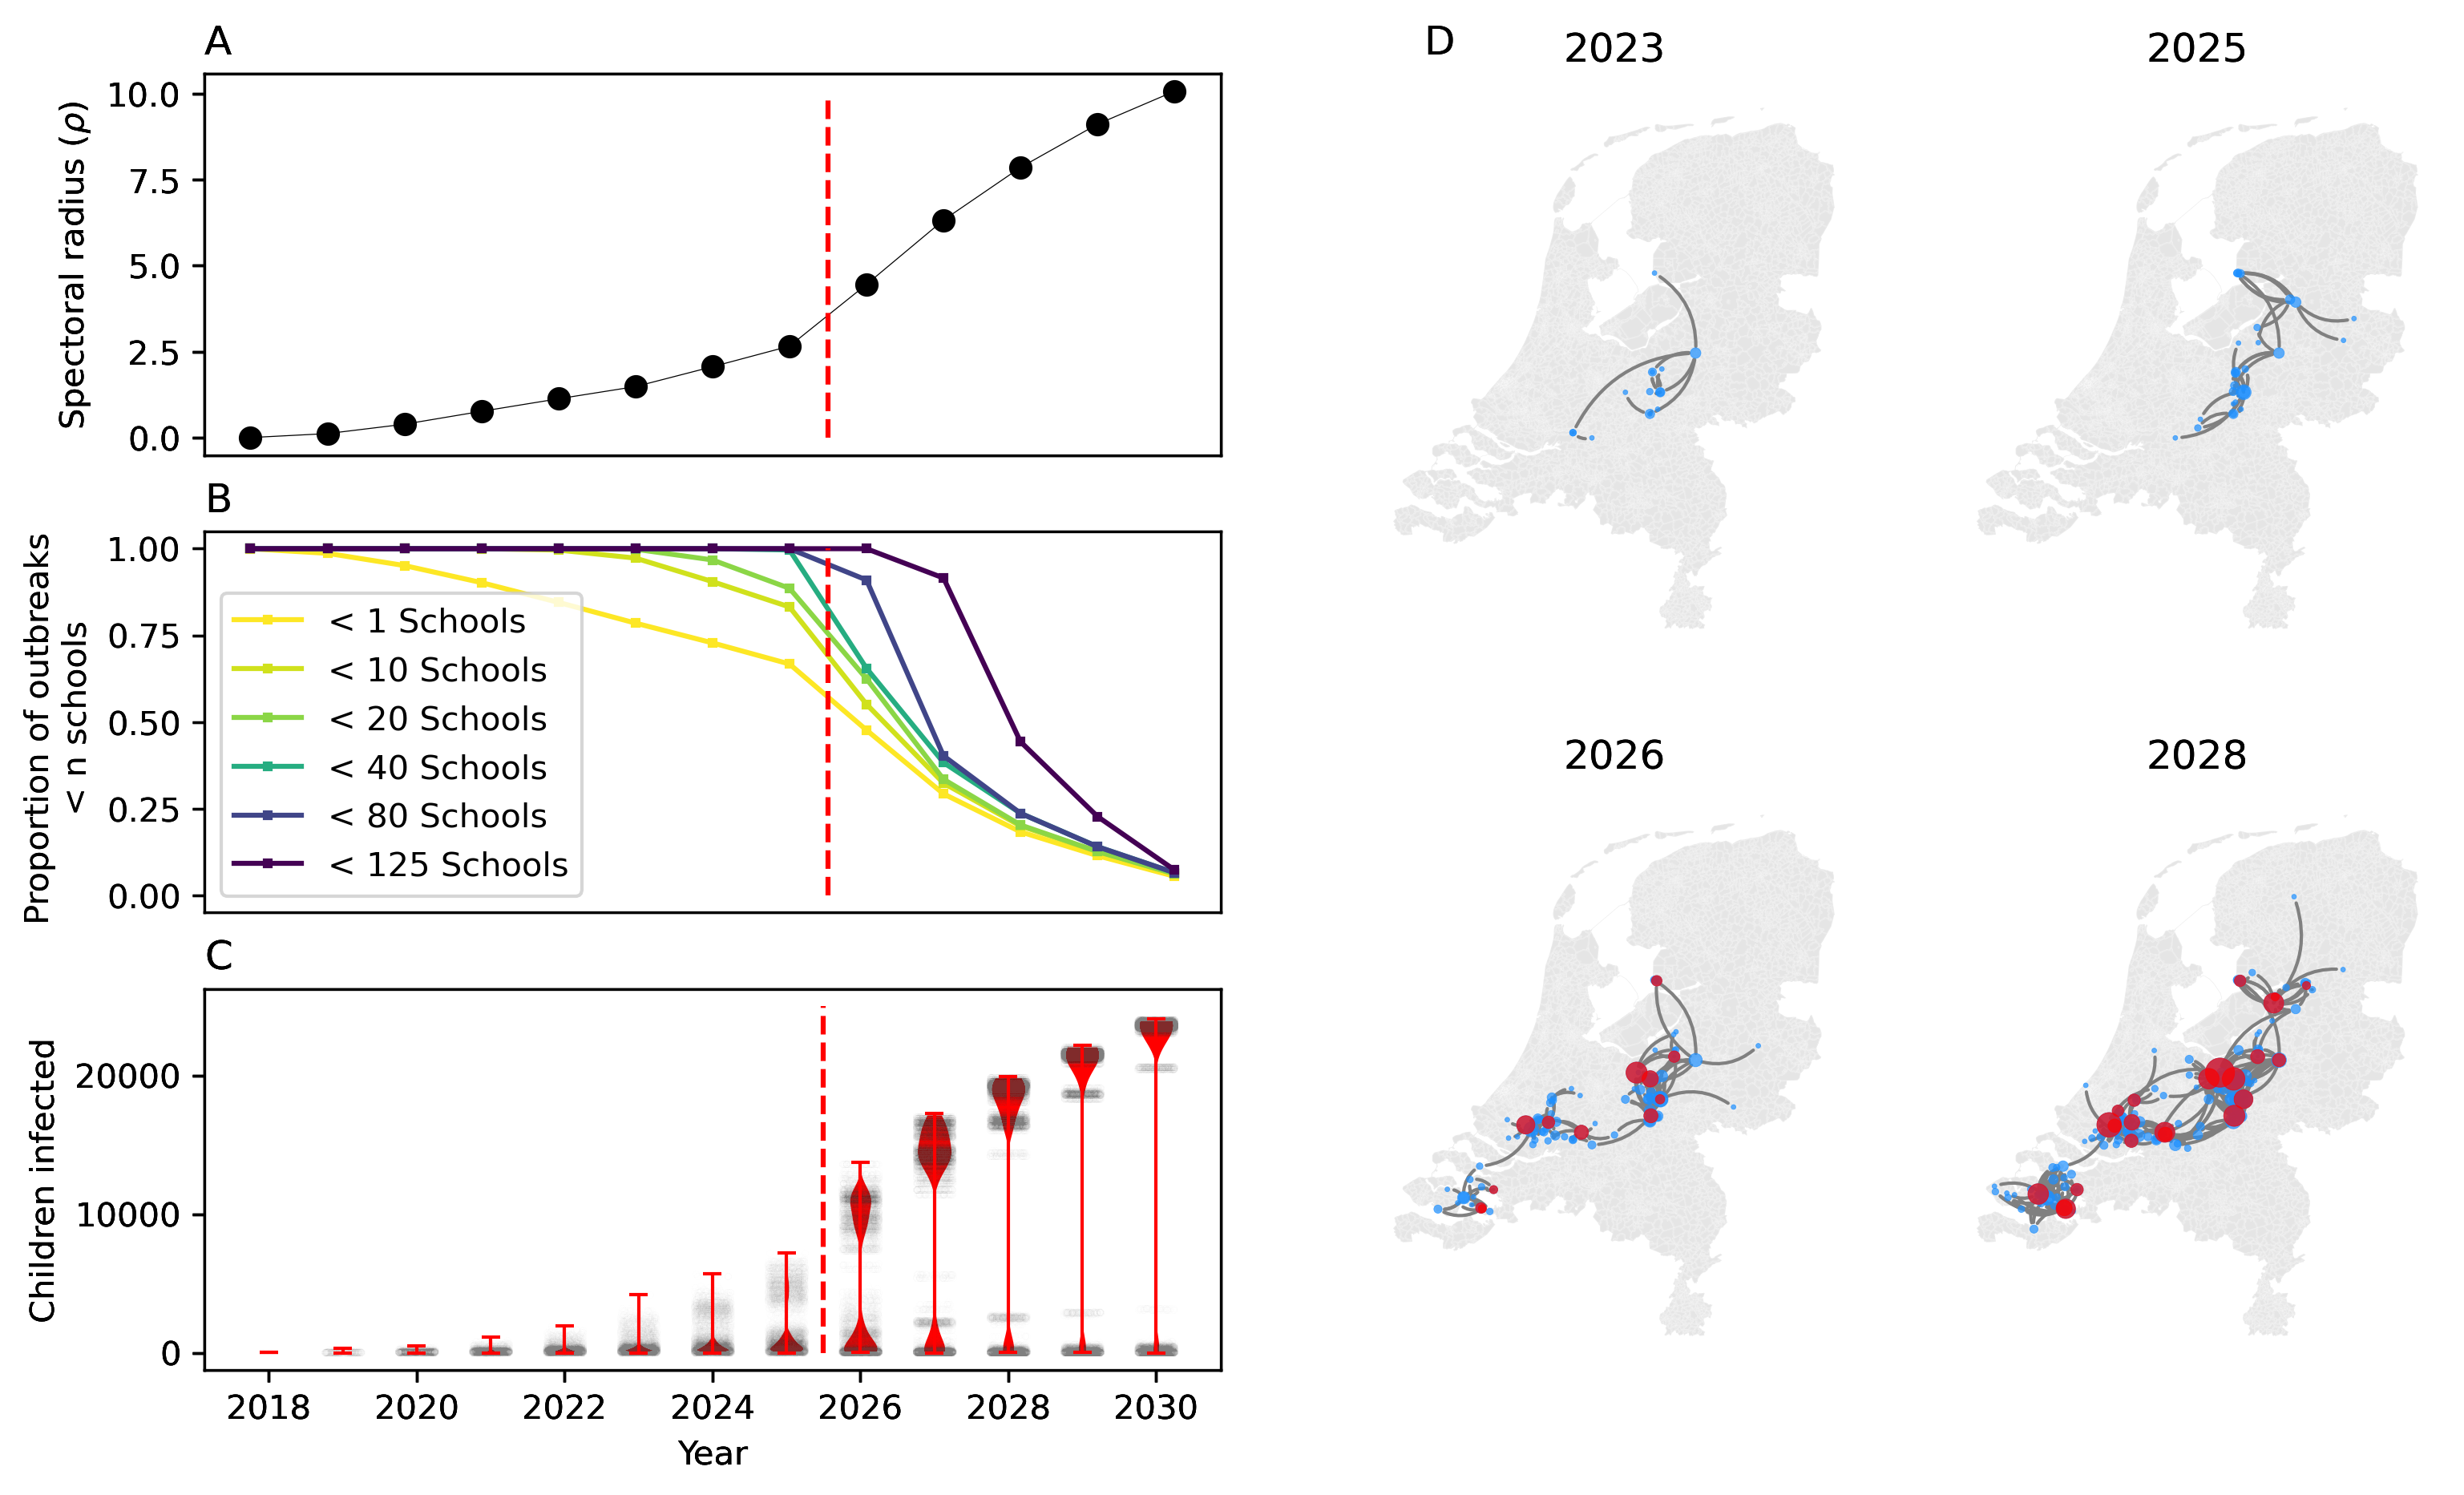

In [624]:
figure

In [1222]:
figure.savefig('plots/changing_connectivity.pdf')

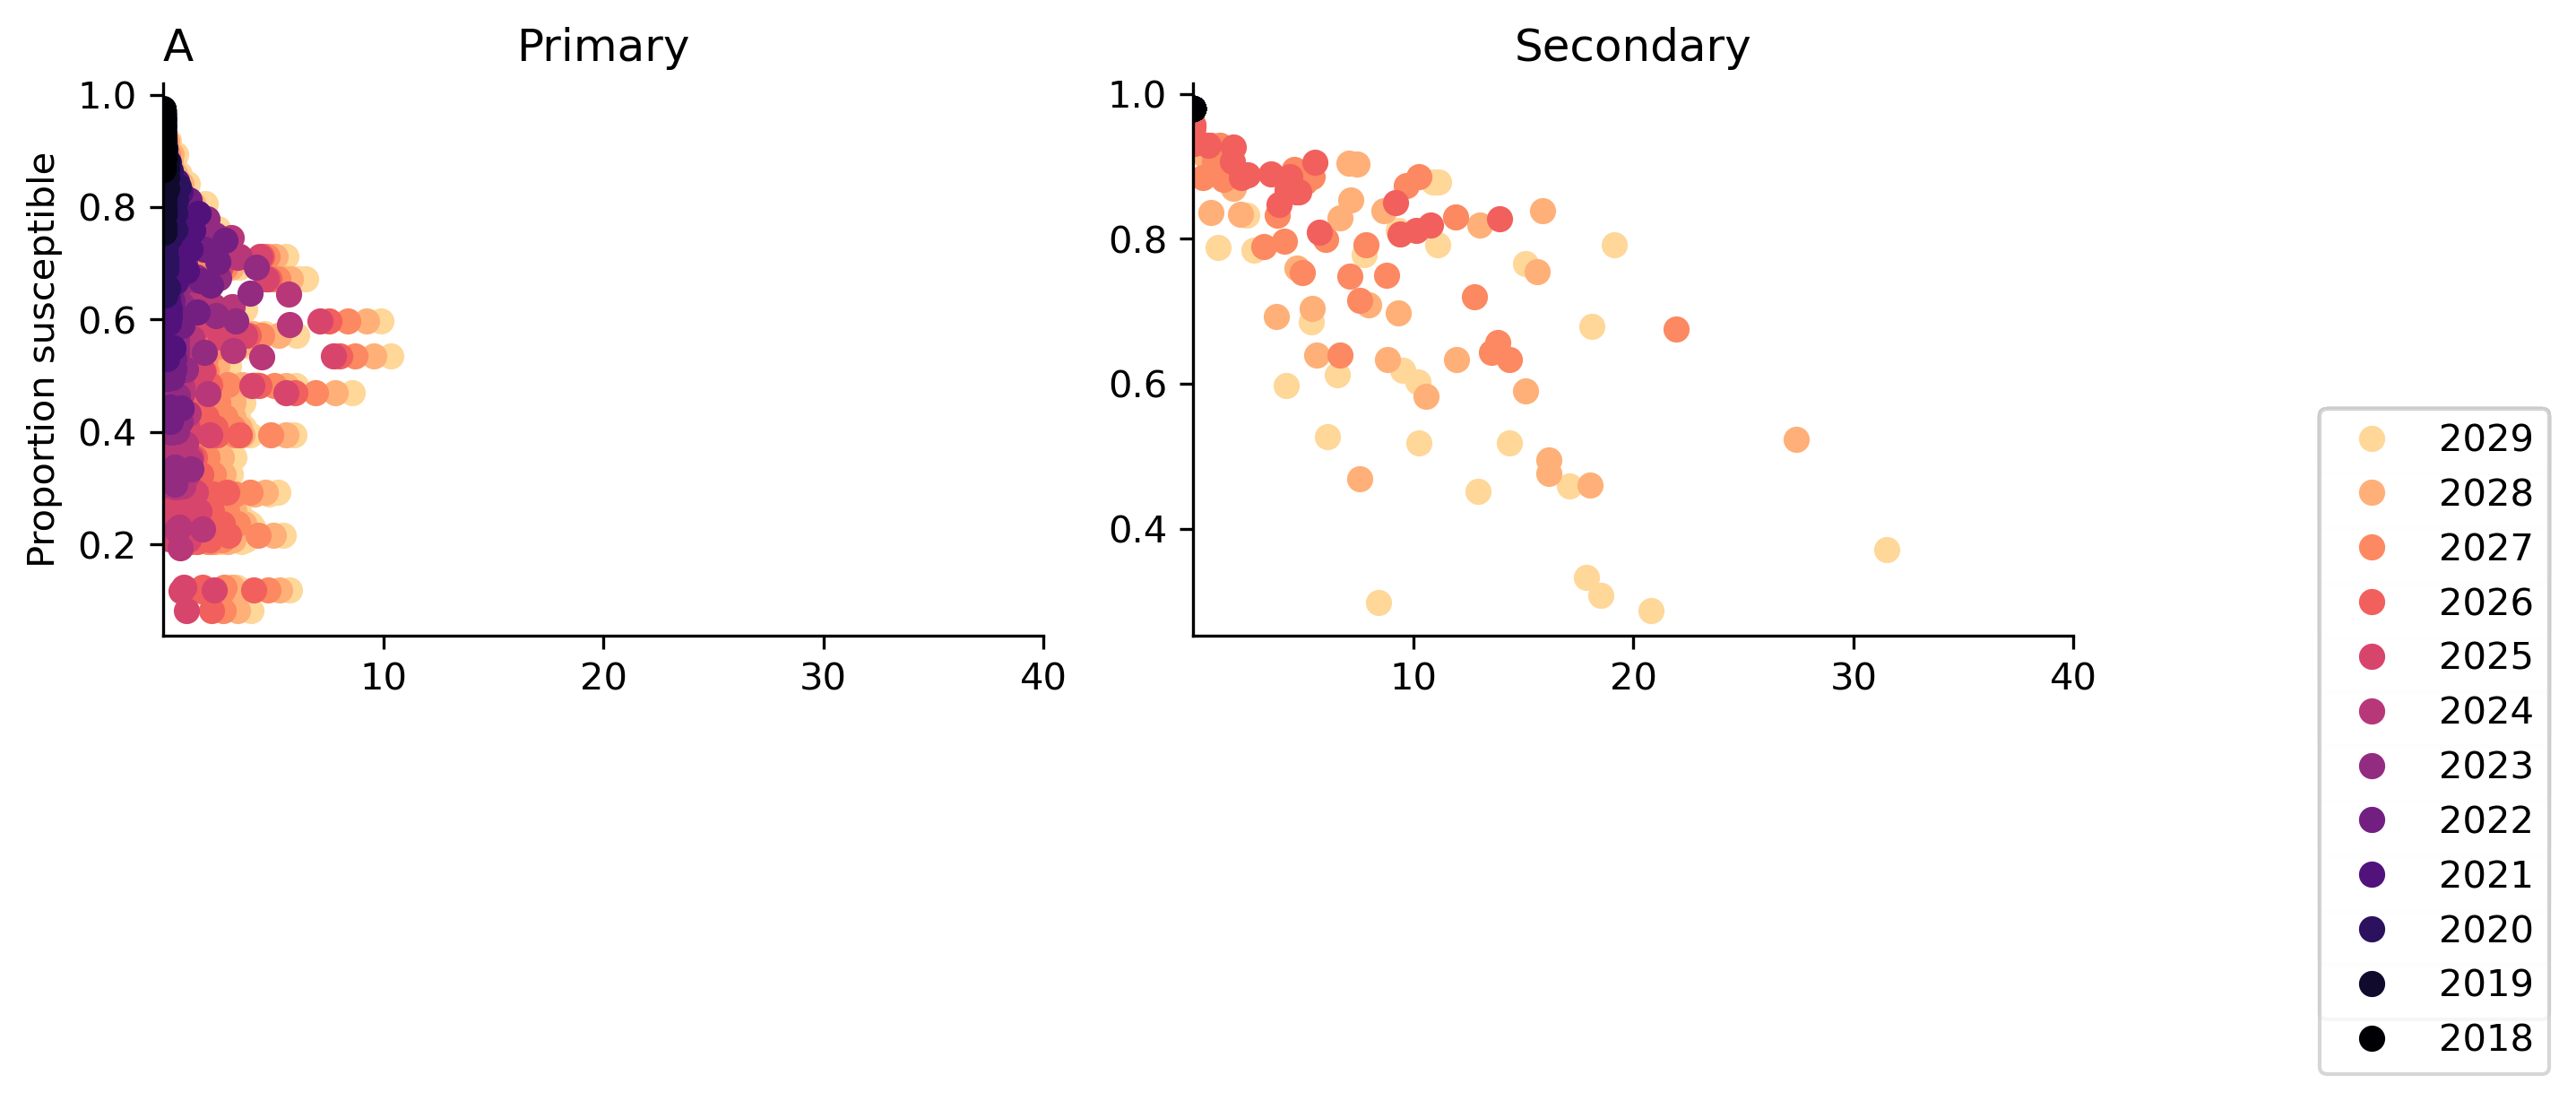

In [1300]:
nosecref = len(np.intersect1d(sec_BRIN, Reformed_BRIN))
nopriref = len(np.intersect1d(pri_BRIN, Reformed_BRIN))

cmap = cm.get_cmap('magma')


fig = plt.figure(figsize=[8, 5], dpi=300)
ax2 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,2)
#twelve = np.arange(0,12)
for n in np.arange(0,12)[::-1]: 

    tm = hickle.load('outputs/netresyso/transmats/transmat_' + str(n) +'.hkl').todense()*1.0
    obnet = transnet.create_network_from_transmat(tm,nodelist=transnet.nodes)
    trans_prob_degree = pd.DataFrame([list(n) for n in list(obnet.out_degree(weight='weight'))])
    trans_prob_degree.columns = ['BRIN', 'No. Schools Infected']
    trans_prob_degree['vacc'] = [vacc_dict_yso_dict['sample ' + str(n)][node] for node in trans_prob_degree.BRIN]
    ax2.plot(trans_prob_degree.query('BRIN in @Reformed_BRIN and BRIN in @pri_BRIN')['No. Schools Infected'], 
             trans_prob_degree.query('BRIN in @Reformed_BRIN and BRIN in @pri_BRIN')['vacc'], 'o', color=cmap(n/12))
    ax3.plot(trans_prob_degree.query('BRIN in @Reformed_BRIN and BRIN in @sec_BRIN')['No. Schools Infected'], 
             trans_prob_degree.query('BRIN in @Reformed_BRIN and BRIN in @sec_BRIN')['vacc'], 'o', color=cmap(n/12), 
             label=2014 + 4 + n)
    #ax2.plot(bins_pri[:-1], vals_pri/nopriref, 'o', color=cmap(n/12))
    
    ax2.set_title('Primary')
    ax3.set_title('Secondary')
    ax2.set_ylabel('Proportion susceptible')
    #ax2.set_xlabel('Expected number of offspring')
    #ax3.set_xlabel('Expected number of offspring')

    #ax2.set_xscale('log', base=10)
    #ax3.set_xscale('log', base=10)
     
    #ax3.plot(bins_sec[:-1], vals_sec/nosecref, 'o', color=cmap(n/12))
    ax3.set_xlim(10e-6,40)
    ax2.set_xlim(10e-6,40)

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    #ax2.spines['bottom'].set_visible(False)
    #ax2.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    #ax3.spines['bottom'].set_visible(False)
    #ax3.spines['left'].set_visible(False)

    fig.legend(bbox_to_anchor = [0.7,0.2,0.5,0.5])

    ax2.set_title('A', loc='left')


    plt.tight_layout()



In [1301]:
nosecref = len(np.intersect1d(sec_BRIN, Reformed_BRIN))
nopriref = len(np.intersect1d(pri_BRIN, Reformed_BRIN))

cmap = cm.get_cmap('magma')


#fig = plt.figure(figsize=[8, 2.5], dpi=300)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

for n in range(0,12): 

    tm = hickle.load('outputs/netresyso/transmats/transmat_' + str(n) +'.hkl').todense()*1.0
    obnet = transnet.create_network_from_transmat(tm,nodelist=transnet.nodes)
    trans_prob_degree = pd.DataFrame([list(n) for n in list(obnet.out_degree(weight='weight'))])
    trans_prob_degree.columns = ['BRIN', 'No. Schools Infected']
    vals_pri, bins_pri = np.histogram(trans_prob_degree.query('BRIN in @Reformed_BRIN and BRIN in @pri_BRIN')['No. Schools Infected'], bins=np.arange(0,20,2))
    vals_sec, bins_sec = np.histogram(trans_prob_degree.query('BRIN in @Reformed_BRIN and BRIN in @sec_BRIN')['No. Schools Infected'], bins=np.arange(0,30,2))
    ax2.plot(bins_pri[:-1], vals_pri/nopriref, 'x-', color=cmap(n/12))
    ax2.set_ylim([0,0.4])
    #ax2.set_title('Primary')
    #ax3.set_title('Secondary')
    ax2.set_ylabel('proportion of schools')
    ax2.set_xlabel('Expected number of offspring')
    ax3.set_xlabel('Expected number of offspring')
     
    ax3.plot(bins_sec[:-1], vals_sec/nosecref, 'x-', color=cmap(n/12))
    ax3.set_ylim([0,0.4])

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    #ax2.spines['bottom'].set_visible(False)
    #ax2.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    #ax3.spines['bottom'].set_visible(False)
    #ax3.spines['left'].set_visible(False)


    plt.tight_layout()
    ax2.set_title('B', loc='left')

<Figure size 1920x1440 with 0 Axes>

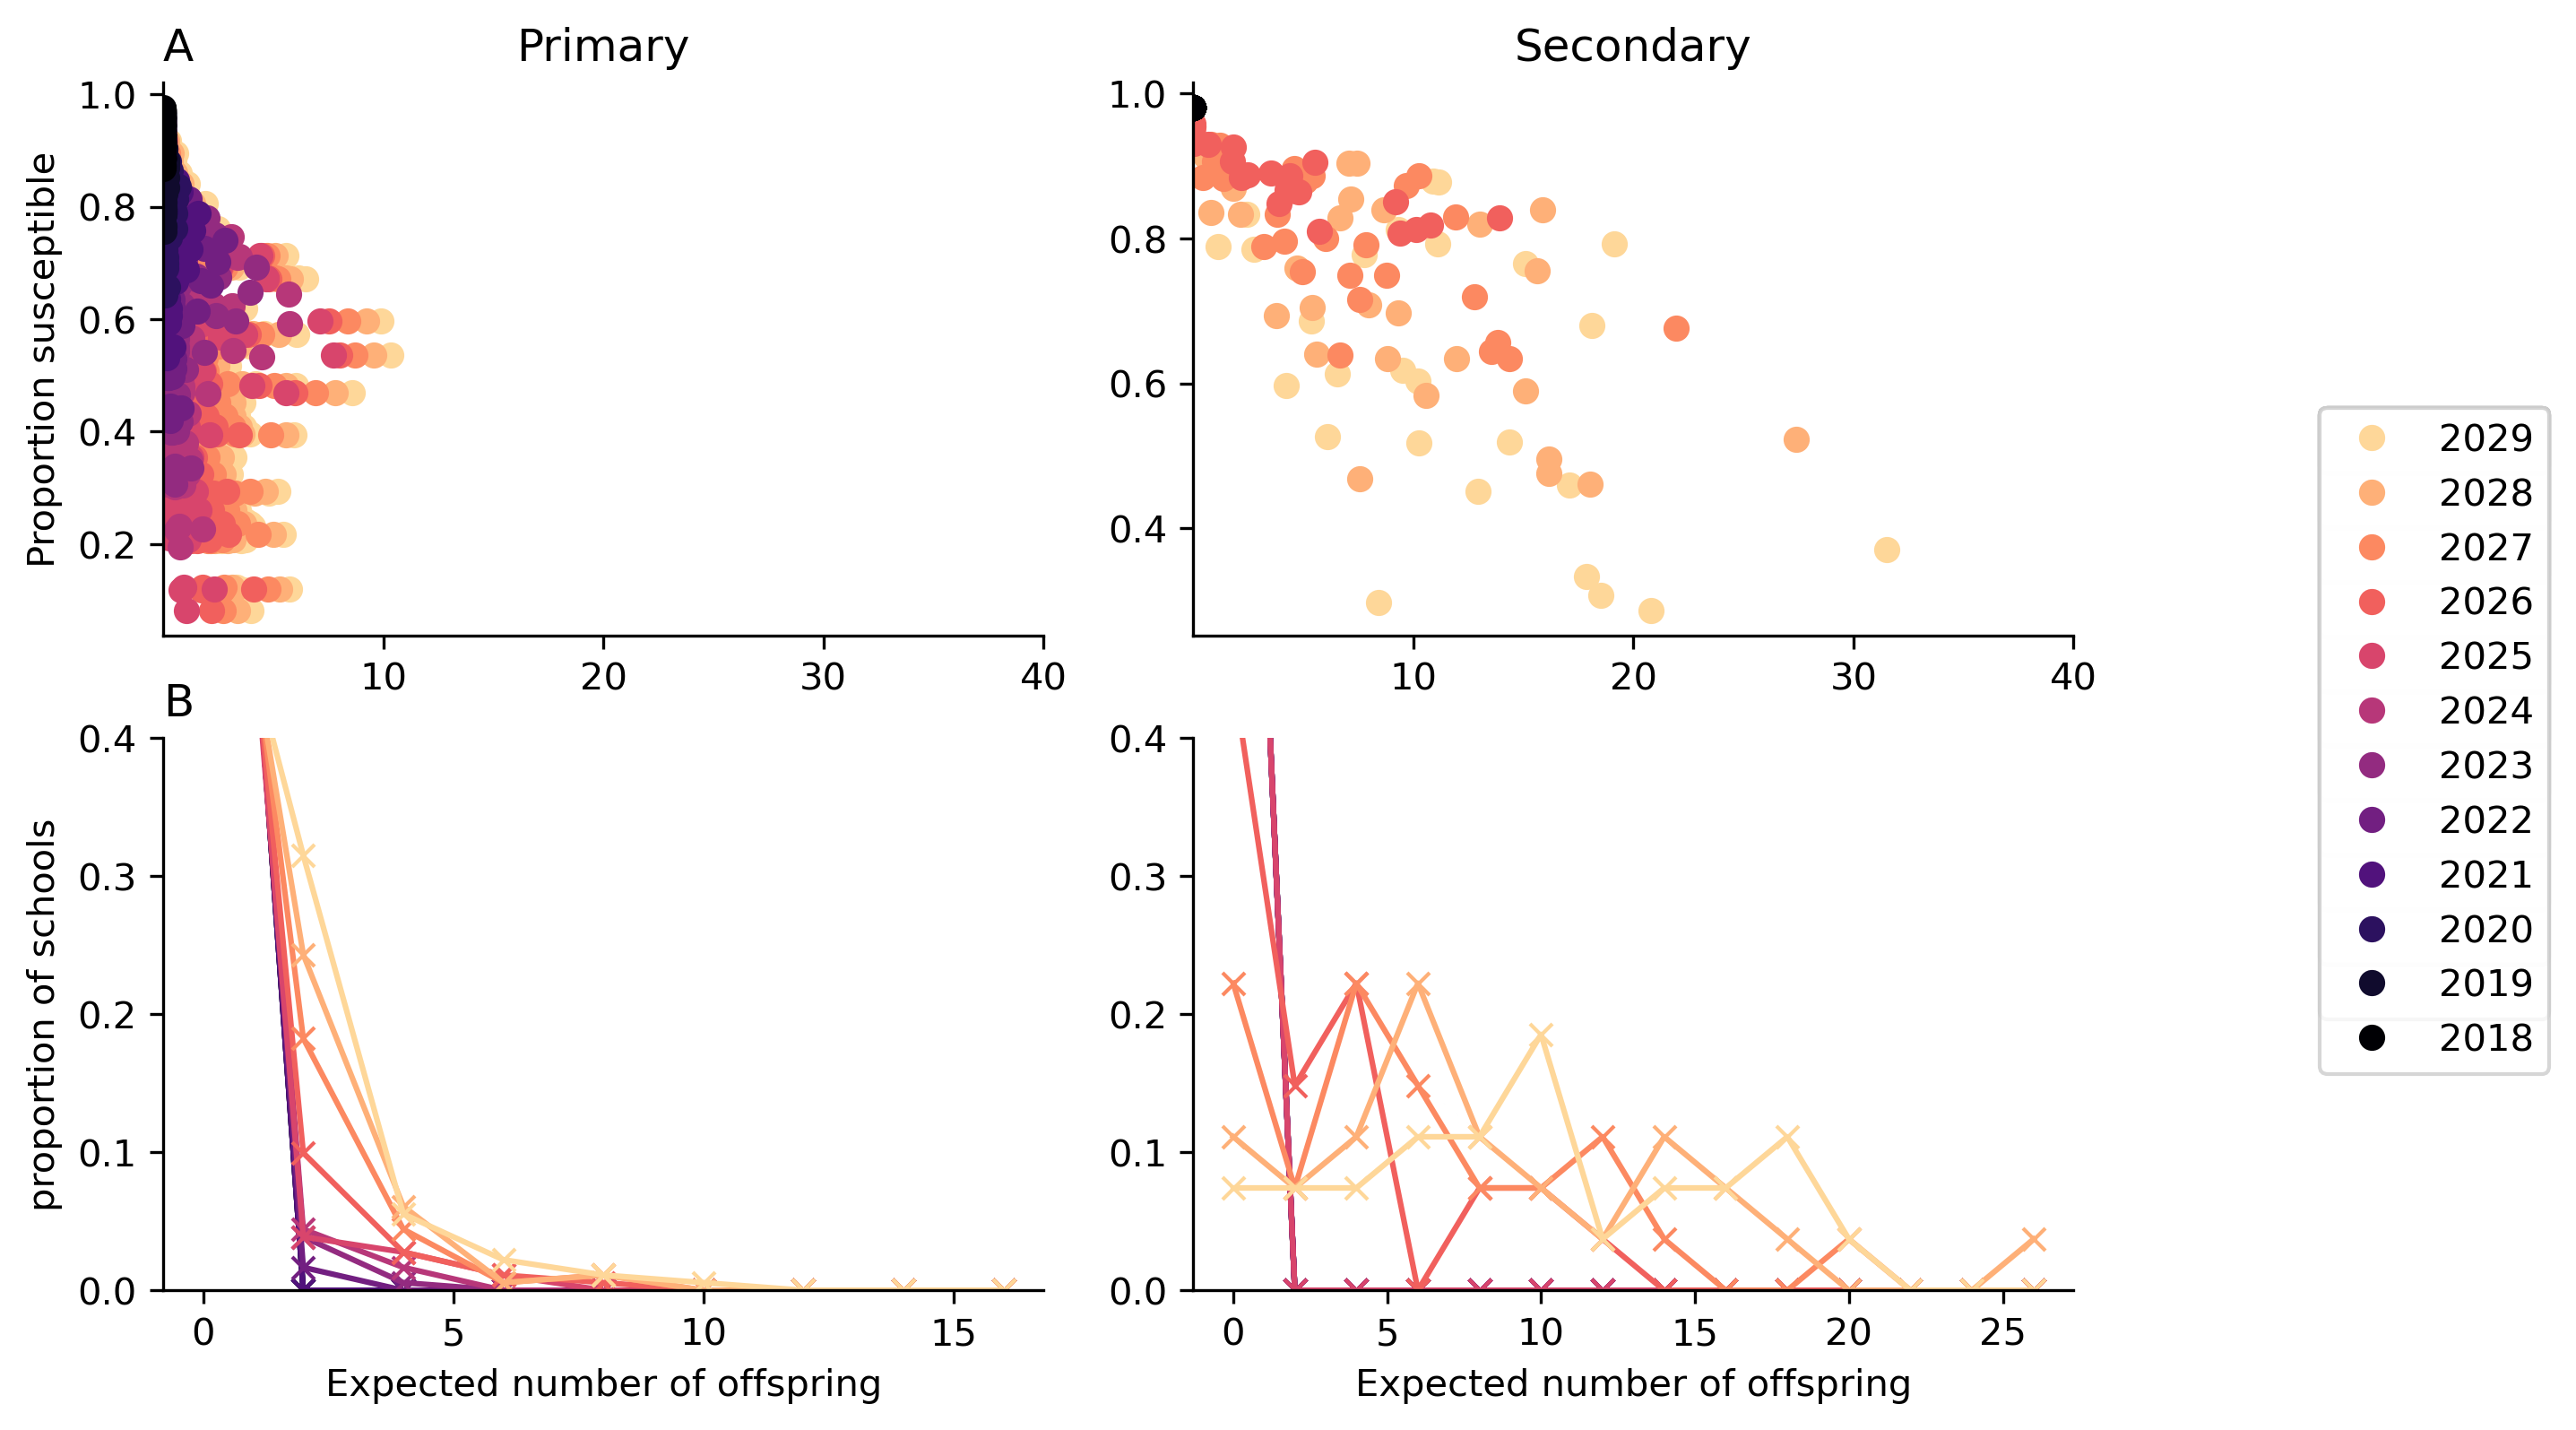

In [1302]:
fig

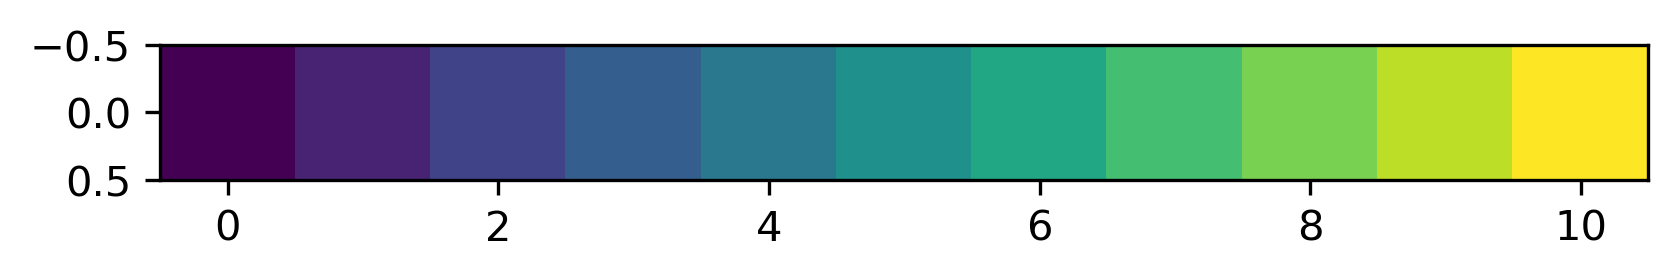

In [1247]:
pic = plt.imshow([np.arange(0, 1.1,0.1)], cmap='viridis')

Text(0.5, 0, 'Proportion susceptible')

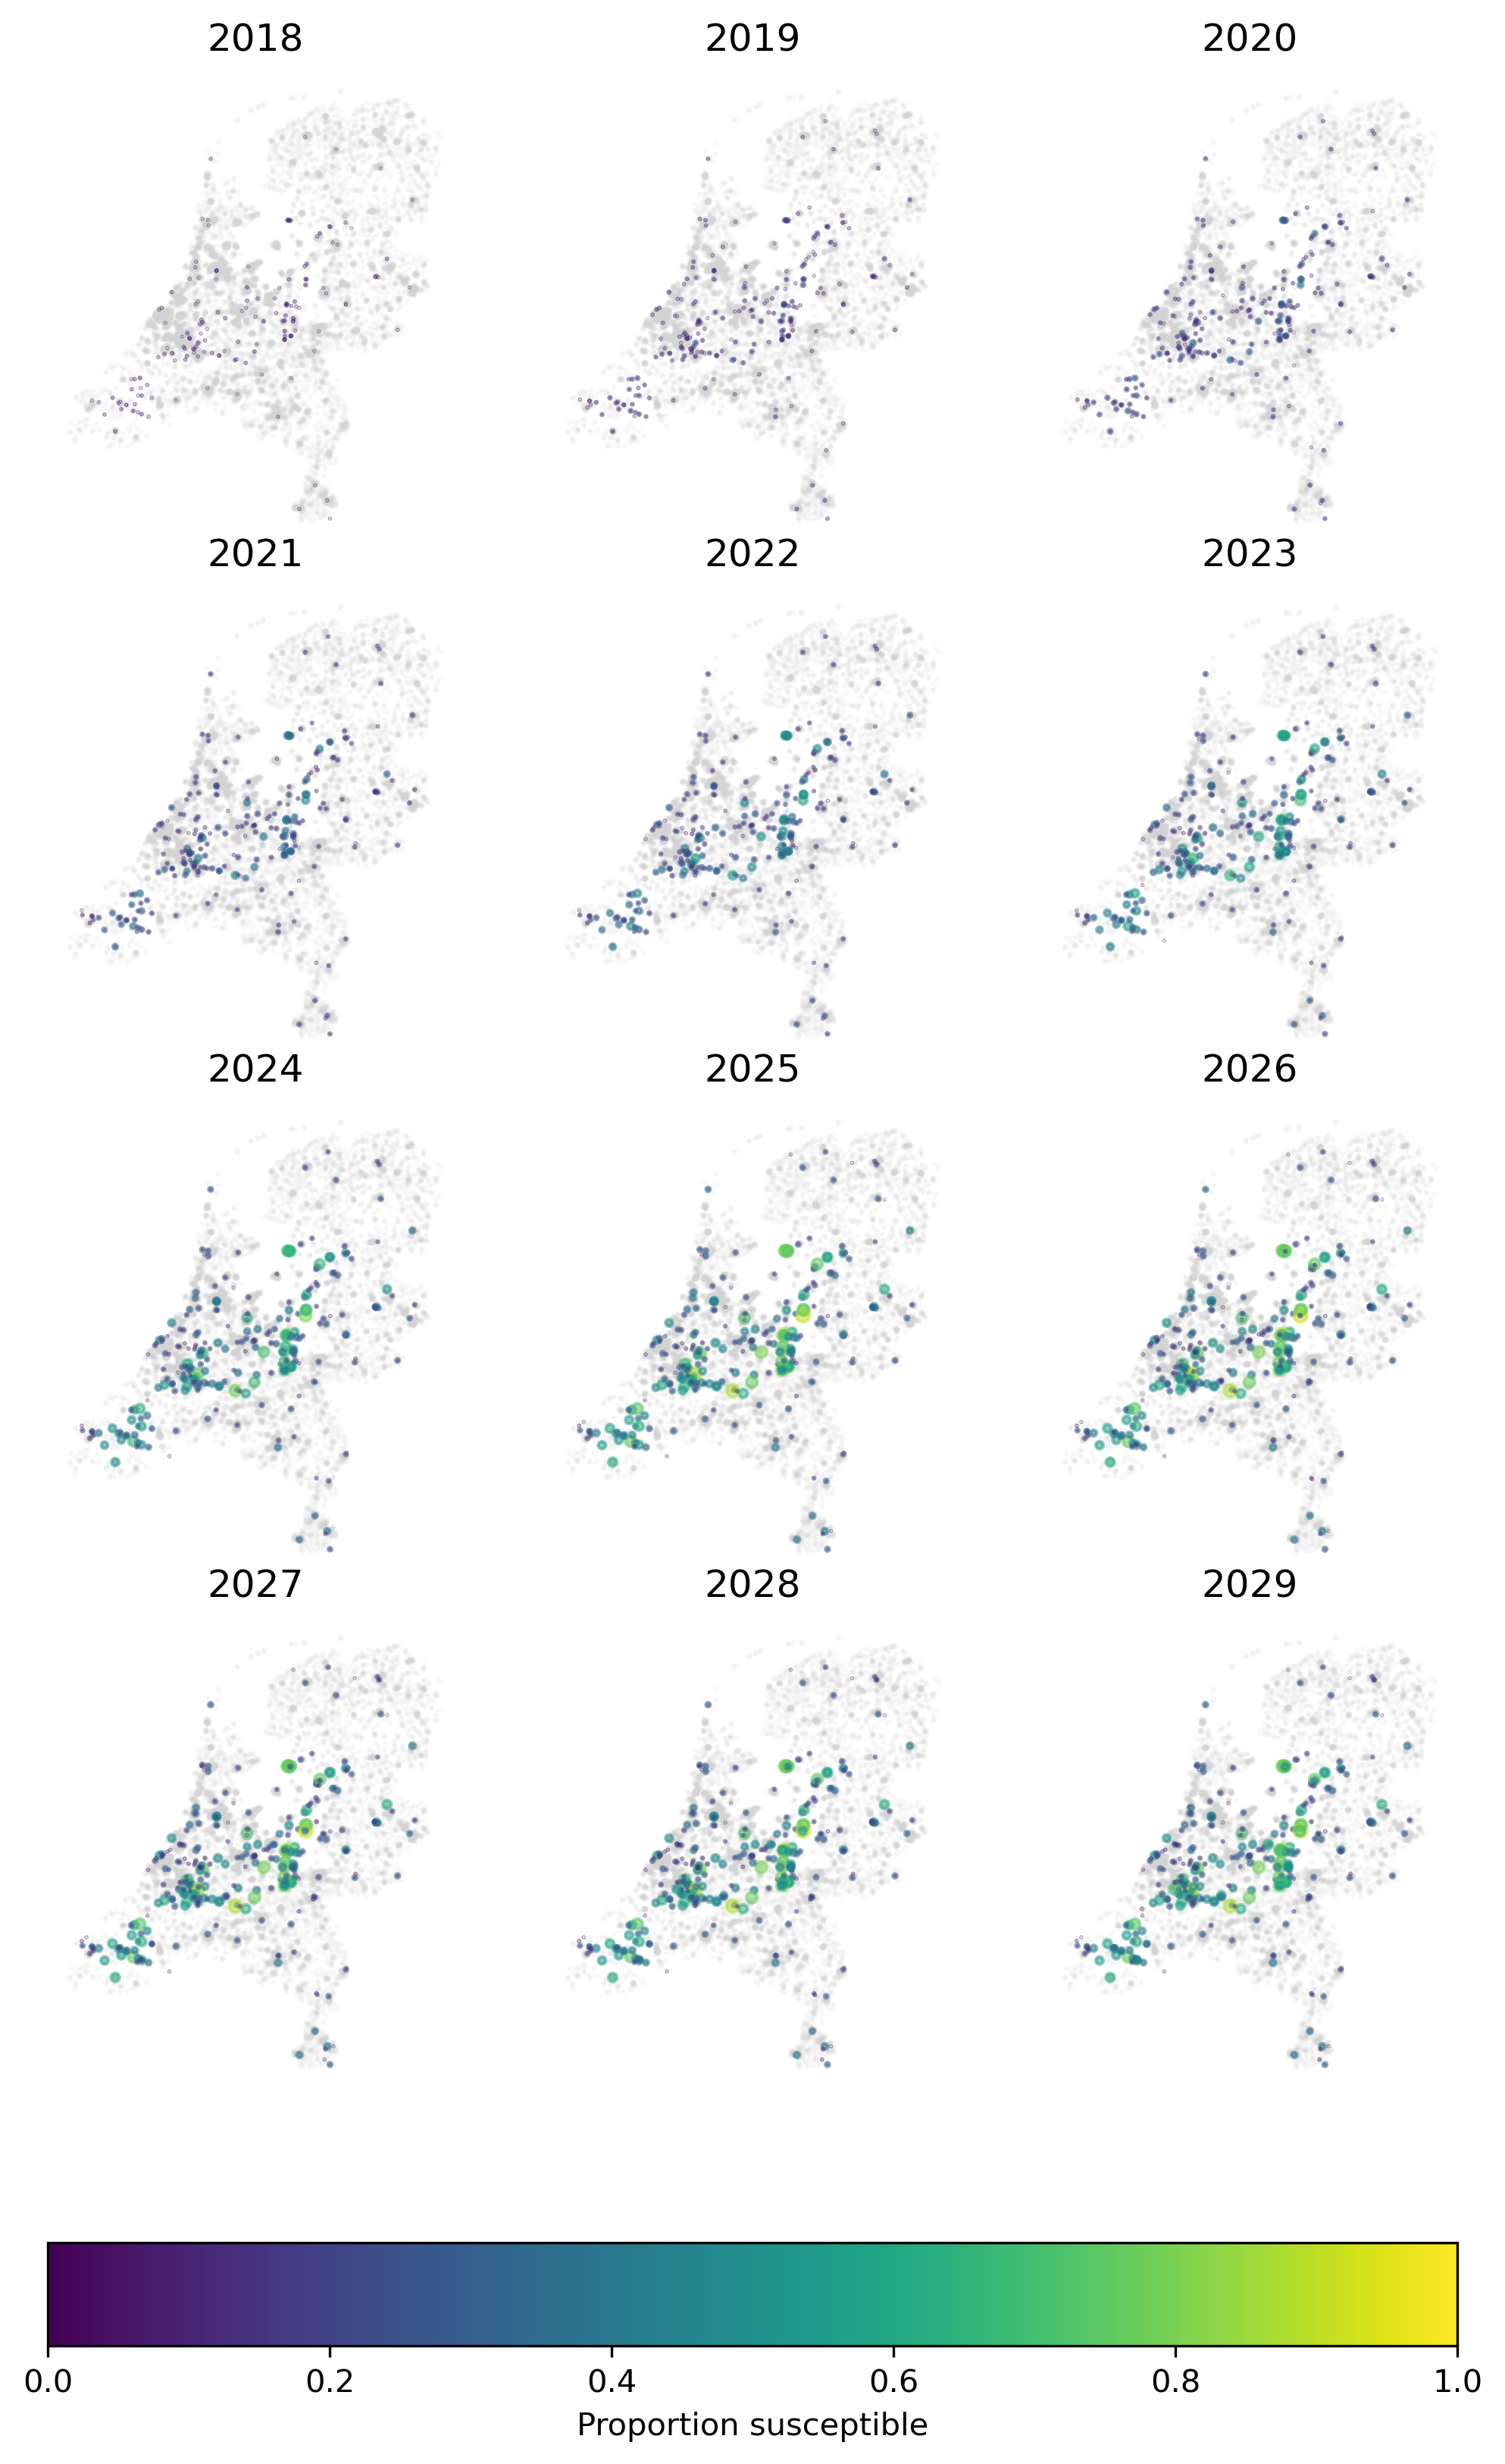

In [1248]:
fig = plt.figure(figsize=[8,13])
for n in range(12):
    ax = fig.add_subplot(9,3,(int(np.floor(n/3)*(3)  + (n+1)), int((3)*np.floor((n)/3)+3 + (n+1))))
    vacc_dict = vacc_dict_yso_dict['sample ' + str(n)]
    vdf = pd.DataFrame.from_dict(vacc_dict, orient='Index').reset_index()
    vdf.columns = ['BRIN', 'vacc']
    
    school_data_vacc = transnet.school_data.merge(vdf, on = 'BRIN')
    
    school_data_vacc['imm'] = 1- school_data_vacc.vacc
    
    school_data_vacc.query('imm<0.05').plot(markersize=1, color='lightgray', alpha = 0.1, ax=ax)
    school_data_vacc.query('imm>0.05').plot('imm', 
                                            markersize=(school_data_vacc.query('imm>0.05').imm**2)*20, 
                                            ax=ax, 
                                            vmin=0, 
                                            vmax=1, 
                                           alpha = 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(2014 + 4 + n)

ax= fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('none')
ax.set_xticks([])
ax.set_yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size='5%', pad=0.5)
plt.colorbar(pic, cax=cax, orientation='horizontal', alpha=0.5)
cax.set_xlabel('Proportion susceptible', size=10)


In [1098]:

def get_vacc_pc4(vacc_dict):
    schools_pc4 = dl.load_schools_2_pc4()

    vdf = pd.DataFrame.from_dict(vacc_dict, orient='Index').reset_index()
    vdf.columns = ['BRIN', 'vacc']

    schools_pc4 = schools_pc4.query('PC4 in @pc4_shapes.PC4 & BRIN in @vdf.BRIN')
    
    kids_per_pc4 = schools_pc4.groupby('PC4').sum().reset_index()[['PC4', 'TOTAAL']]
    kids_per_pc4.columns = ['PC4', 'pc4_pop']
    
    kids_per_sch = schools_pc4.groupby('BRIN').sum().reset_index()[['BRIN', 'TOTAAL']]
    kids_per_sch.columns = ['BRIN', 'sch_pop']
    
    schools_pc4 = schools_pc4.merge(kids_per_pc4, on = 'PC4') 
    
    schools_pc4 = schools_pc4.merge(kids_per_sch, on = 'BRIN') 
    
    schools_pc4_vacc = schools_pc4.merge(vdf, on='BRIN')
    
    schools_pc4_vacc['weight_pc4'] = schools_pc4_vacc.TOTAAL / schools_pc4_vacc.pc4_pop
    schools_pc4_vacc['vacc_weight_pc4'] = schools_pc4_vacc.weight_pc4 * schools_pc4_vacc.vacc
    vacc_per_pc4 = schools_pc4_vacc.groupby('PC4').sum().reset_index()[['PC4', 'vacc_weight_pc4', 'weight_pc4']]
    vacc_per_pc4.columns = ['PC4', 'vacc', 'test']

    return vacc_per_pc4

In [1165]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

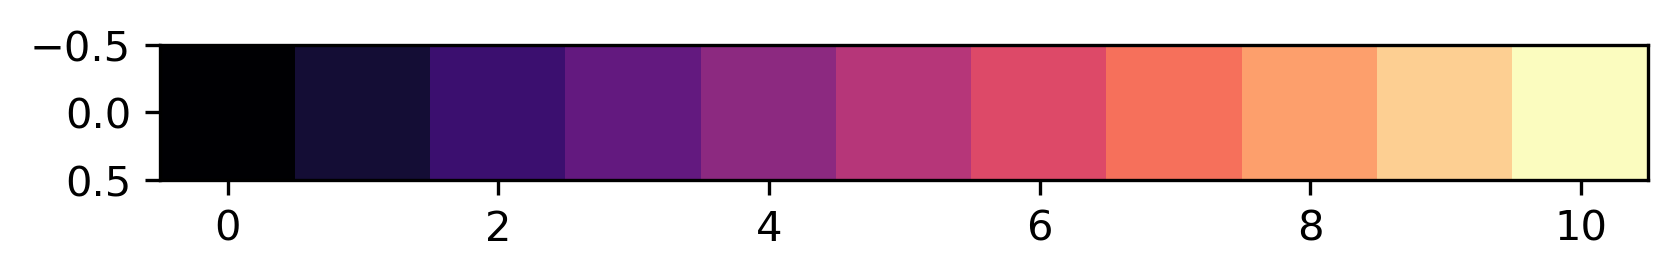

In [1228]:
pic = plt.imshow([np.arange(0, 1.1,0.1)], cmap='magma')

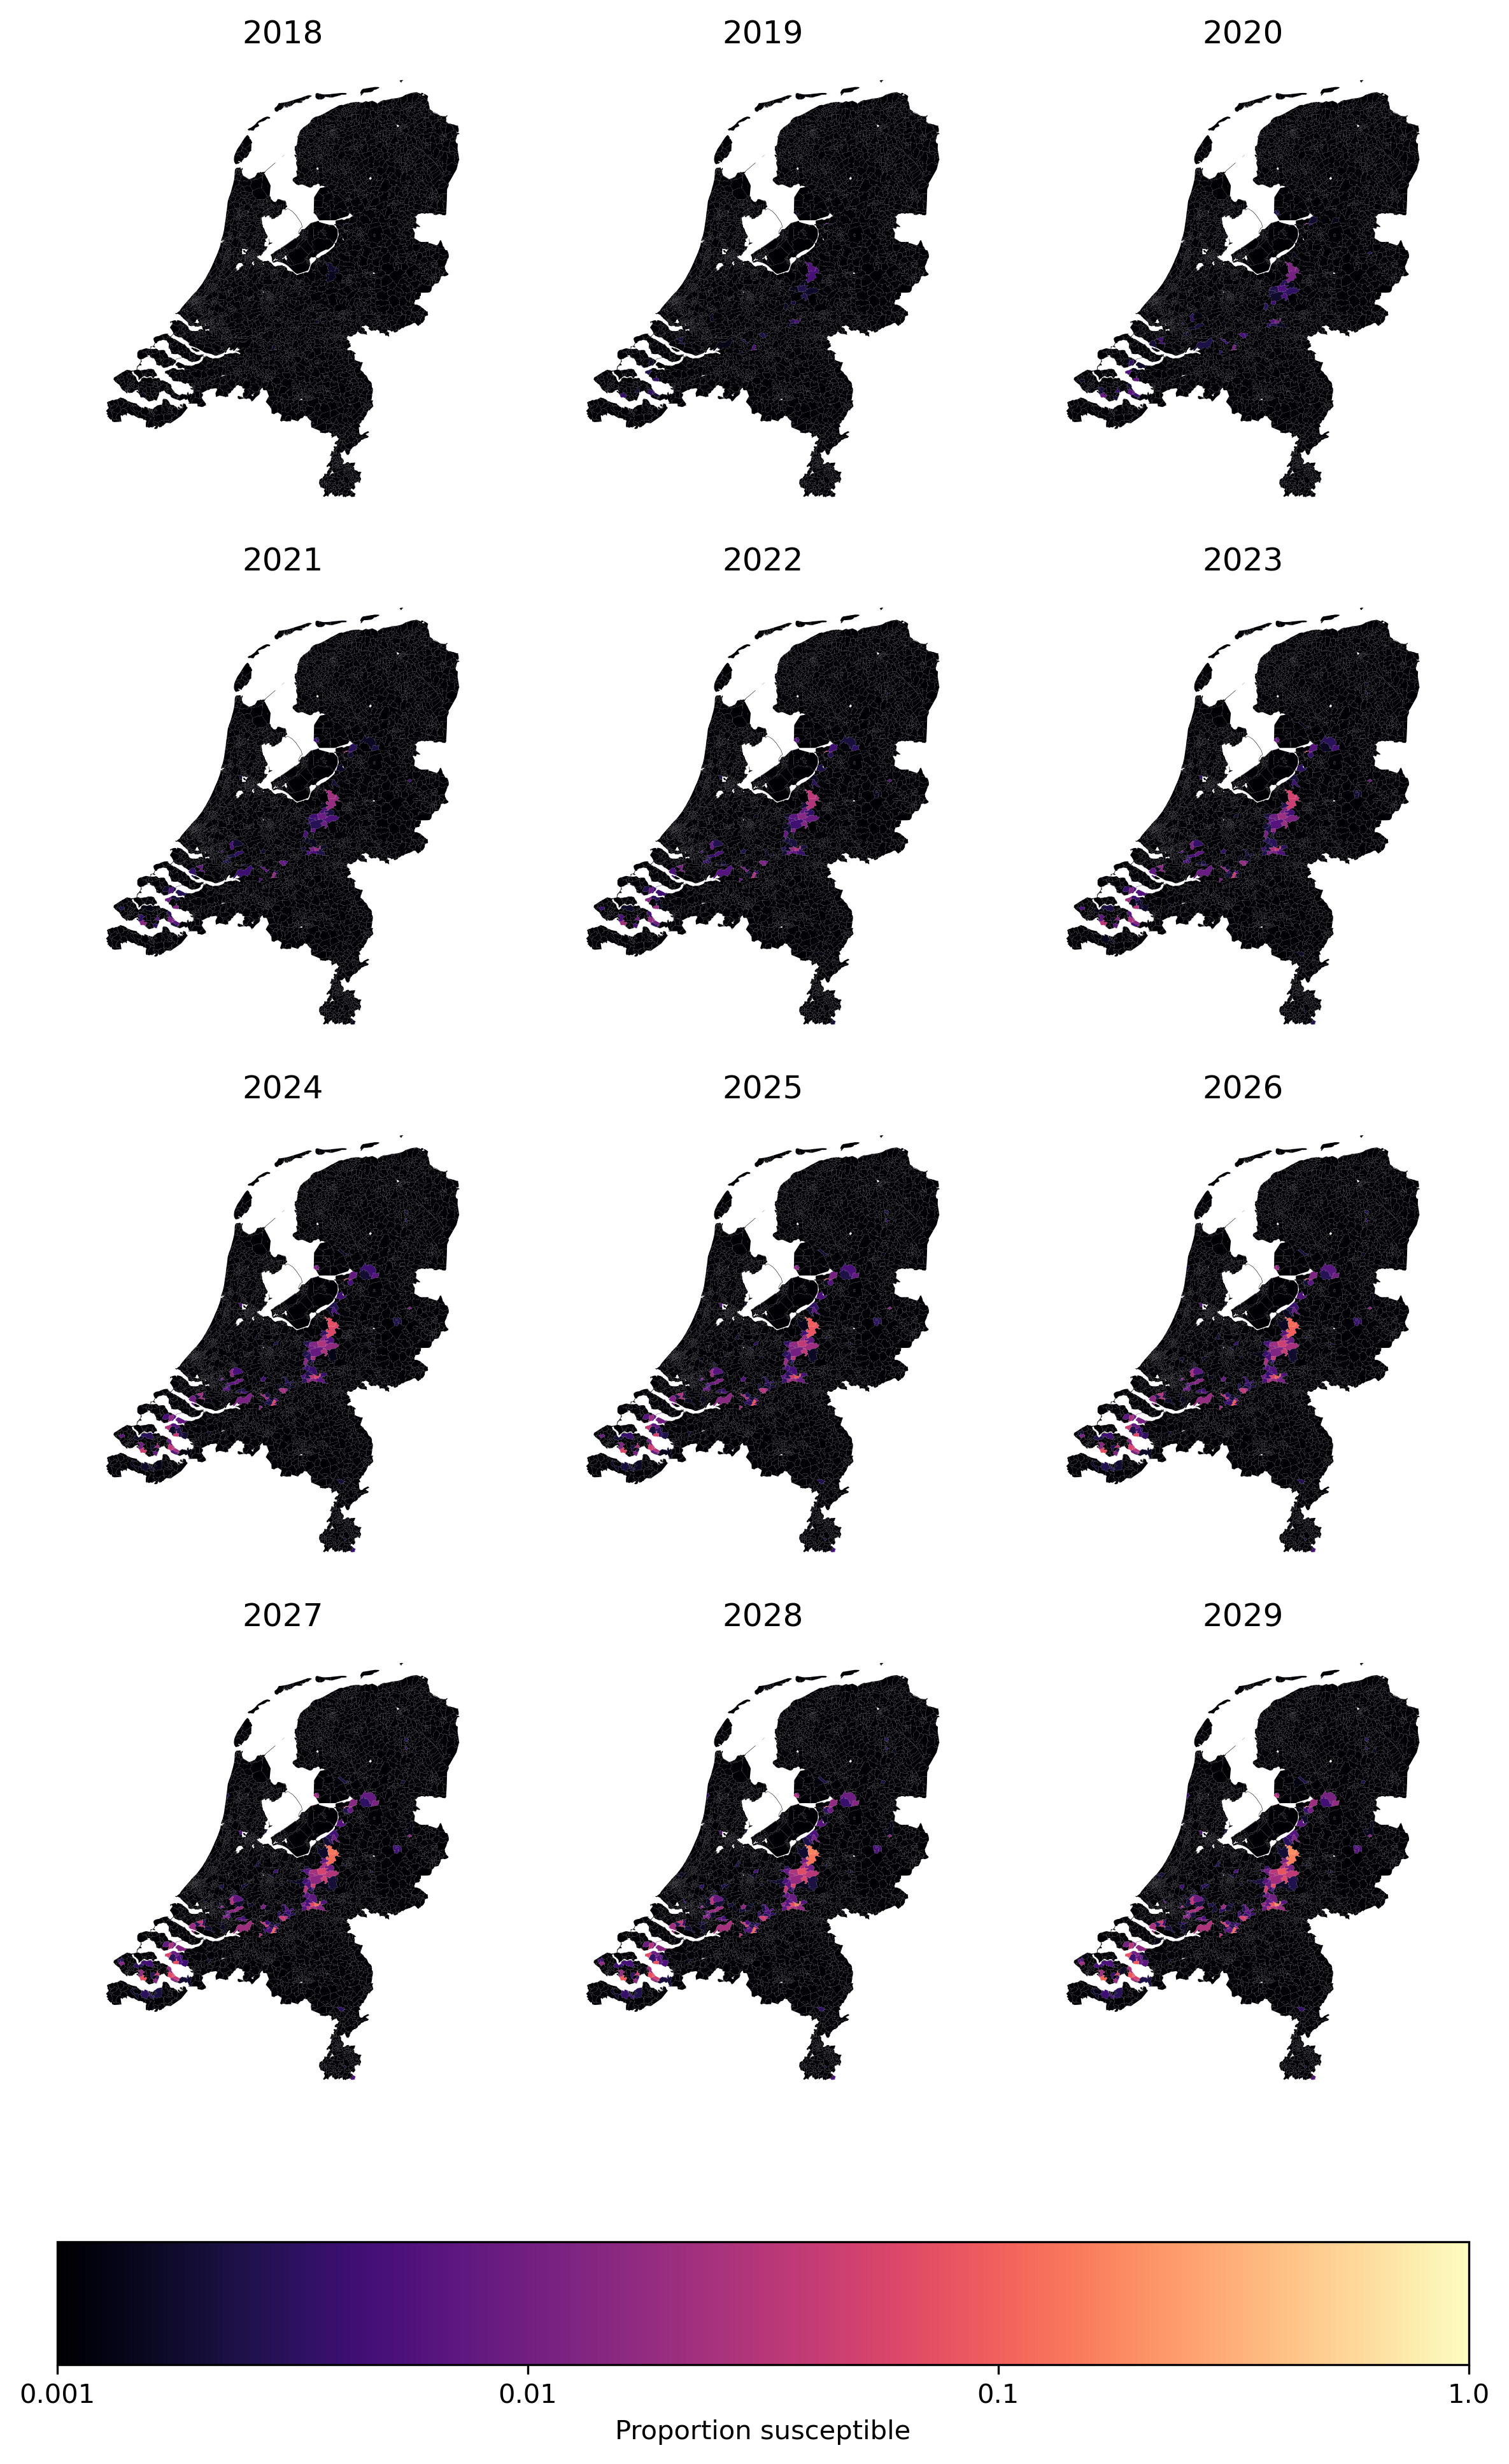

In [1217]:
fig = plt.figure(figsize=[8,13])
for n in range(12):
    ax = fig.add_subplot(9,3,(int(np.floor(n/3)*(3)  + (n+1)), int((3)*np.floor((n)/3)+3 + (n+1))))
    vacc_dict_n = vacc_dict_yso_dict['sample ' + str(n)]
    vacc_pc4_df = get_vacc_pc4(vacc_dict_n)
    
    pc4_shapes_vacc = pc4_shapes.merge(vacc_pc4_df, on='PC4')
    
    pc4_shapes_vacc['vacc'] = pc4_shapes_vacc.vacc.fillna(1)
    
    pc4_shapes_vacc['susceptible'] = np.log(1.0 - pc4_shapes_vacc.vacc)
    
    pc4_shapes_vacc.plot('susceptible', cmap = cm.get_cmap('magma'), ax=ax, vmin=-3, vmax=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(2014 + 4 + n)
ax= fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('none')
ax.set_xticks([])
ax.set_yticks([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size='10%', pad=5)
plt.colorbar(pic, cax=cax, orientation='horizontal', alpha=0.5)
cax.set_xlabel('Proportion susceptible', size=10)
values = 10**(np.arange(-3, 0.1, 1))
locations = 1- np.arange(-3, 0.1, 1)/-3
cax.set_xticks(locations)
cax.set_xticklabels(values)
fig.tight_layout()

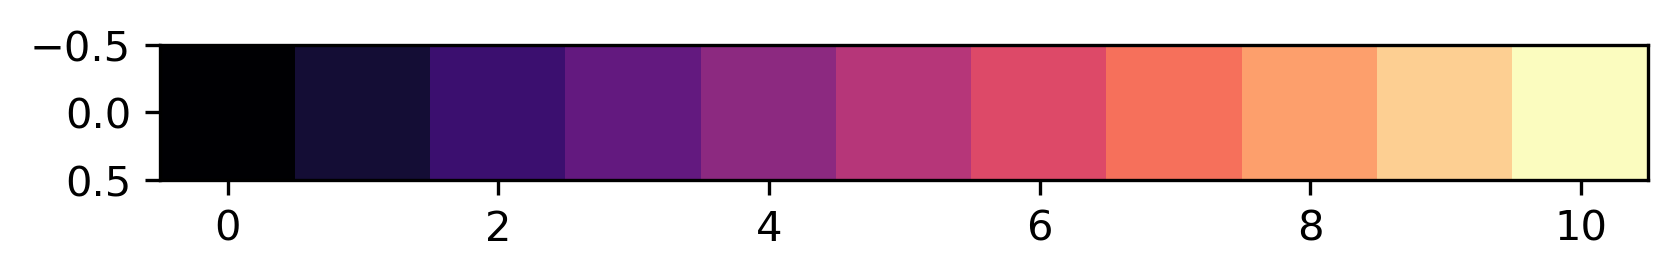

In [1249]:
pic = plt.imshow([np.arange(0, 1.1,0.1)], cmap='magma')

(1, 2)
(3, 4)
(5, 6)
(7, 8)


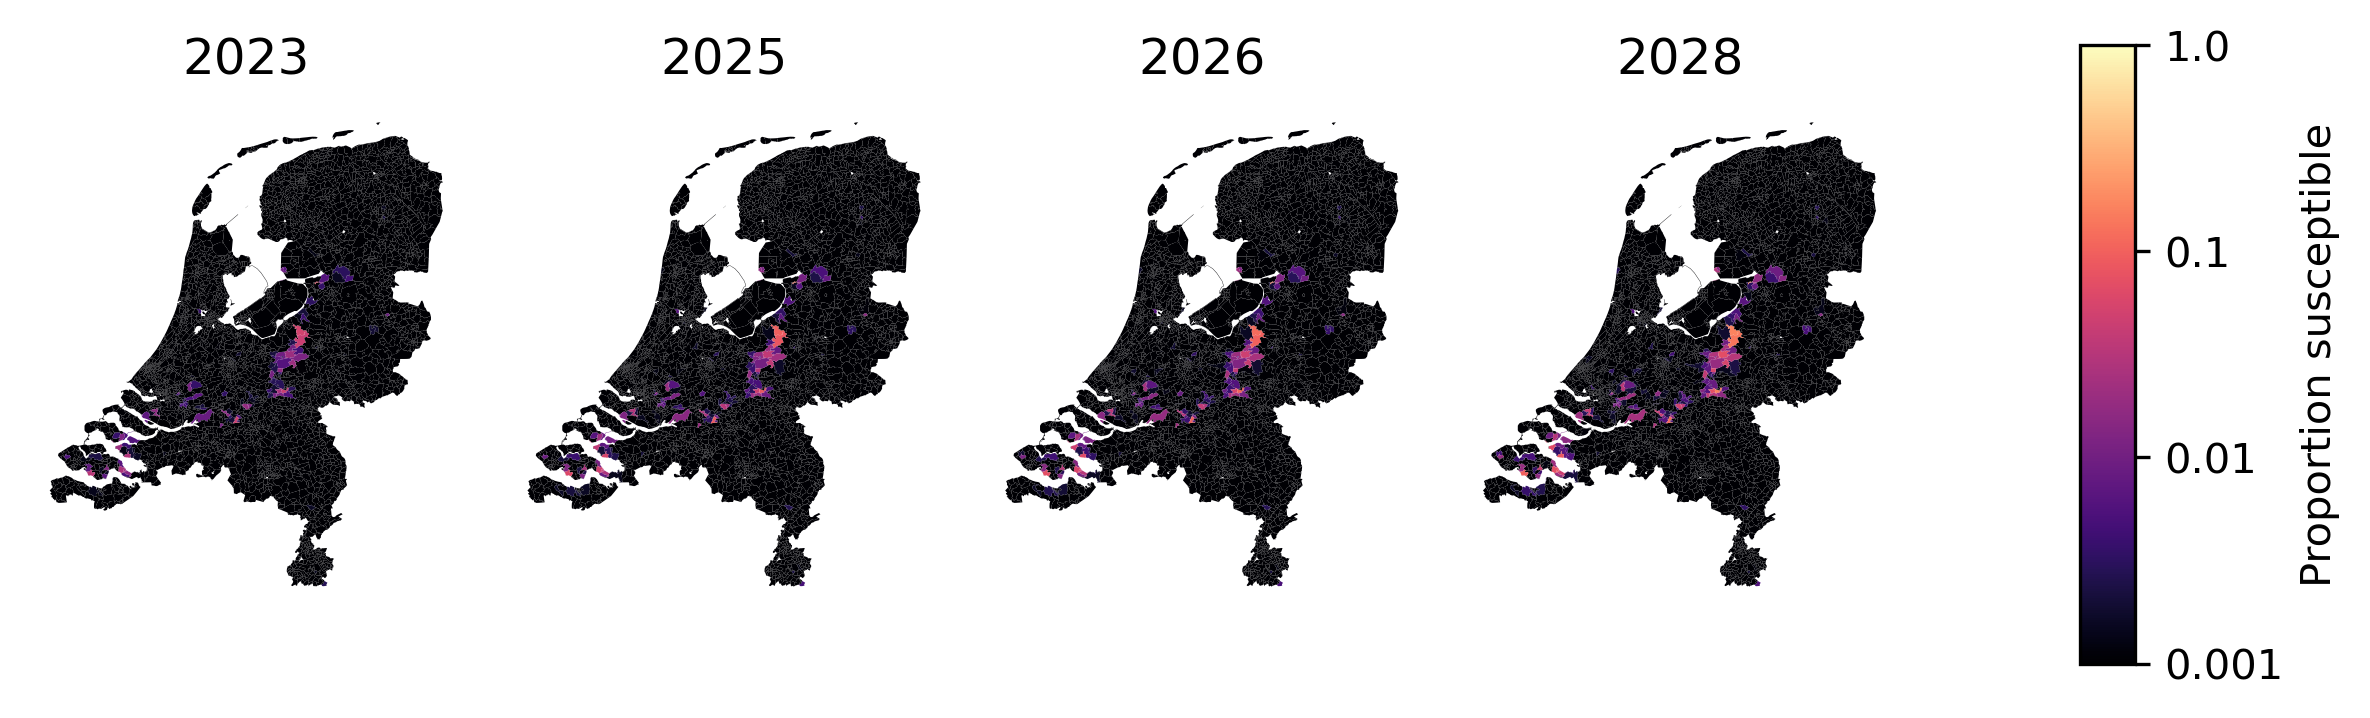

In [1251]:
fig = plt.figure(figsize=[8,2.5])
for p, n in enumerate([5,7,8,10]):
    ax = fig.add_subplot(1,9,(p*2+1,p*2+2))
    print((p*2+1,p*2+2))
    vacc_dict_n = vacc_dict_yso_dict['sample ' + str(n)]
    vacc_pc4_df = get_vacc_pc4(vacc_dict_n)
    
    pc4_shapes_vacc = pc4_shapes.merge(vacc_pc4_df, on='PC4')
    
    pc4_shapes_vacc['vacc'] = pc4_shapes_vacc.vacc.fillna(1)
    
    pc4_shapes_vacc['susceptible'] = np.log(1.0 - pc4_shapes_vacc.vacc)
    
    pc4_shapes_vacc.plot('susceptible', cmap = cm.get_cmap('magma'), ax=ax, vmin=-3, vmax=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(2014 + 4 + n)
ax= fig.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('none')
ax.set_xticks([])
ax.set_yticks([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='10%', pad=5)
plt.colorbar(pic, cax=cax, orientation='vertical', alpha=0.5)
cax.set_ylabel('Proportion susceptible', size=10)
values = 10**(np.arange(-3, 0.1, 1))
locations = 1- np.arange(-3, 0.1, 1)/-3
cax.set_yticks(locations)
cax.set_yticklabels(values)
fig.tight_layout()